In [60]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Function to count total files in a folder
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Define paths for training, testing, and validation datasets
train_files_healthy = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Train/Train/Healthy"
train_files_powdery = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Train/Train/Powdery"
train_files_rust = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Train/Train/Rust"

test_files_healthy = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Test/Test/Healthy"
test_files_powdery = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Test/Test/Powdery"
test_files_rust = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Test/Test/Rust"

valid_files_healthy = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Validation/Validation/Healthy"
valid_files_powdery = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Validation/Validation/Powdery"
valid_files_rust = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/Validation/Validation/Rust"

# Print number of files in each category
print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powdery leaf images in training set:", total_files(train_files_powdery))
print("Number of rusty leaf images in training set:", total_files(train_files_rust))

Number of healthy leaf images in training set: 458
Number of powdery leaf images in training set: 430
Number of rusty leaf images in training set: 434


In [50]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [51]:
# Generate augmented images and save to disk for training
augmented_train_dir = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/t_aug"
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    save_to_dir=augmented_train_dir,
    save_prefix='aug_',
    save_format='jpg'
)

Found 1322 images belonging to 3 classes.


In [52]:
# Generate augmented images and save to disk for validation
augmented_validation_dir = "B:/VESP/CPP_Last_Try/Rhamnus davurica/Dataset/v_aug"
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    save_to_dir=augmented_validation_dir,
    save_prefix='aug_',
    save_format='jpg'
)

Found 60 images belonging to 3 classes.


In [53]:
# Constructing the CNN model with 3 convolutional layers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Define callbacks for saving the best model during training
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

In [56]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17217904123025246872
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5682233344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2182466540115629951
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [57]:
# Train the model with data augmentation
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[checkpoint])

Epoch 1/20
42/42 [==============================] - ETA: 0s - loss: 1.0900 - accuracy: 0.4690
Epoch 1: val_accuracy improved from -inf to 0.56667, saving model to best_model.h5
42/42 [==============================] - 57s 1s/step - loss: 1.0900 - accuracy: 0.4690 - val_loss: 0.8581 - val_accuracy: 0.5667
Epoch 2/20
42/42 [==============================] - ETA: 0s - loss: 0.8591 - accuracy: 0.5711
Epoch 2: val_accuracy improved from 0.56667 to 0.73333, saving model to best_model.h5
42/42 [==============================] - 55s 1s/step - loss: 0.8591 - accuracy: 0.5711 - val_loss: 0.6596 - val_accuracy: 0.7333
Epoch 3/20
42/42 [==============================] - ETA: 0s - loss: 0.6344 - accuracy: 0.7307
Epoch 3: val_accuracy improved from 0.73333 to 0.80000, saving model to best_model.h5
42/42 [==============================] - 55s 1s/step - loss: 0.6344 - accuracy: 0.7307 - val_loss: 0.4912 - val_accuracy: 0.8000
Epoch 4/20
42/42 [==============================] - ETA: 0s - loss: 0.4320 -

In [58]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(225, 225),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)  # To preserve the order of predictions
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

Found 150 images belonging to 3 classes.
5/5 [==============================] - 8s 2s/step


In [61]:
#Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

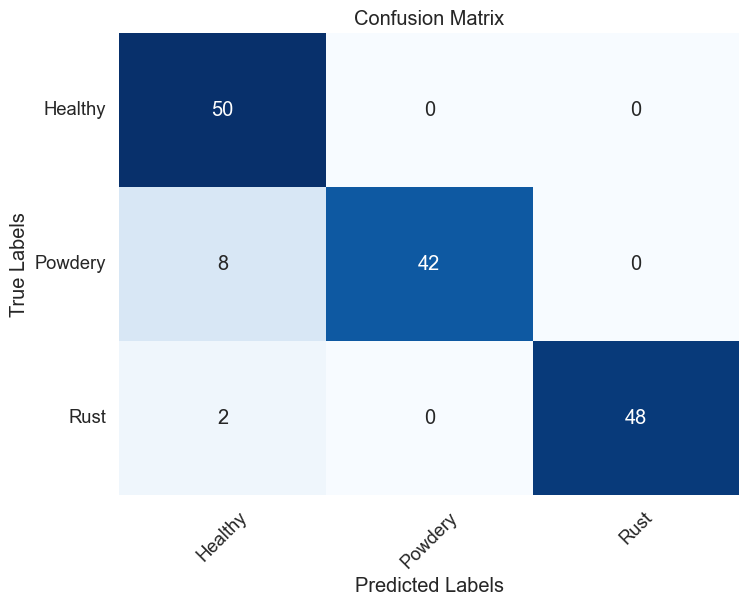

In [62]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [63]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.83      1.00      0.91        50
     Powdery       1.00      0.84      0.91        50
        Rust       1.00      0.96      0.98        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

